In [1]:
import numpy as np
import pandas as pd

In [41]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [42]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [43]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [44]:
# Check for missing values in the dataframe
df.isna().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [45]:
df = df.drop('ID#', axis=1)

In [46]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


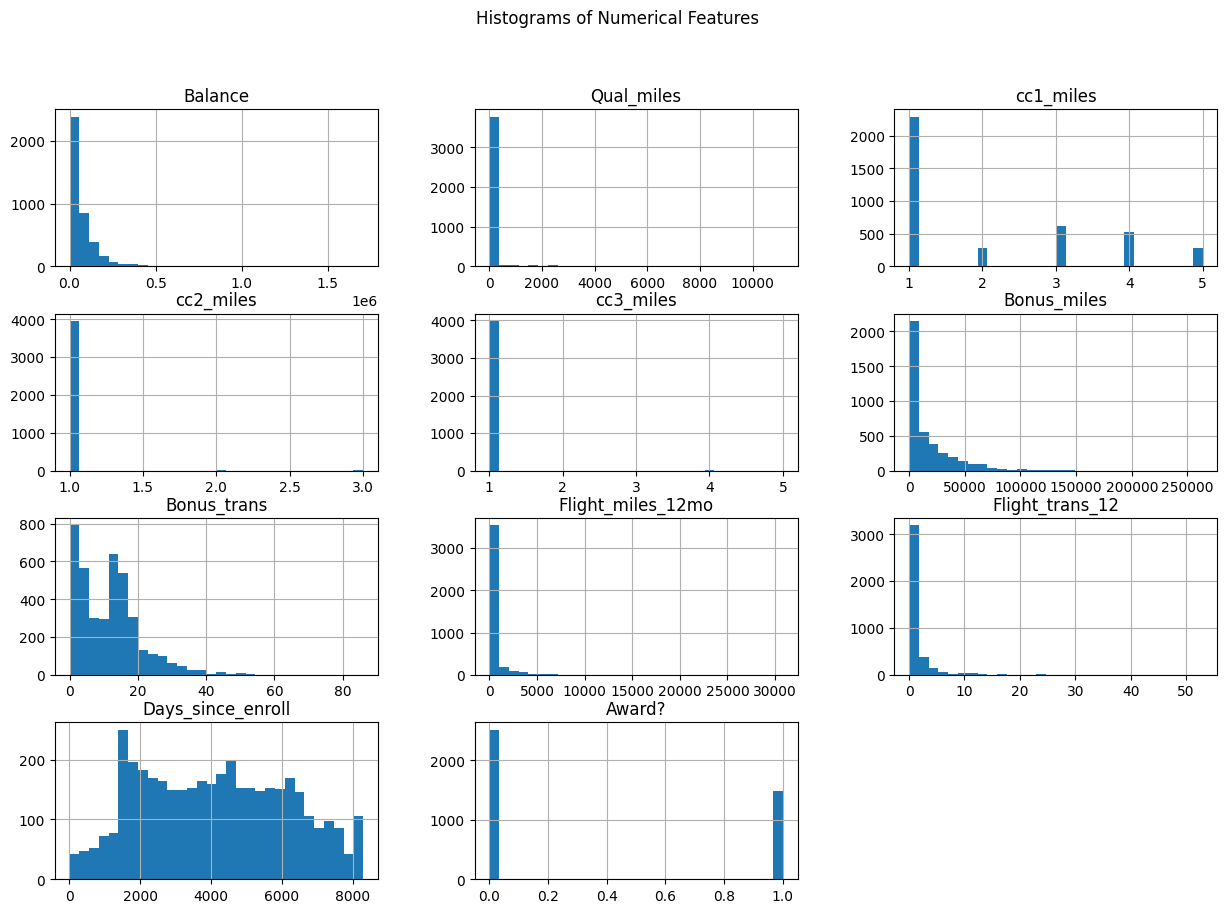

In [47]:
# Histograms for numerical features

import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10)) 
plt.suptitle('Histograms of Numerical Features') 
plt.show()

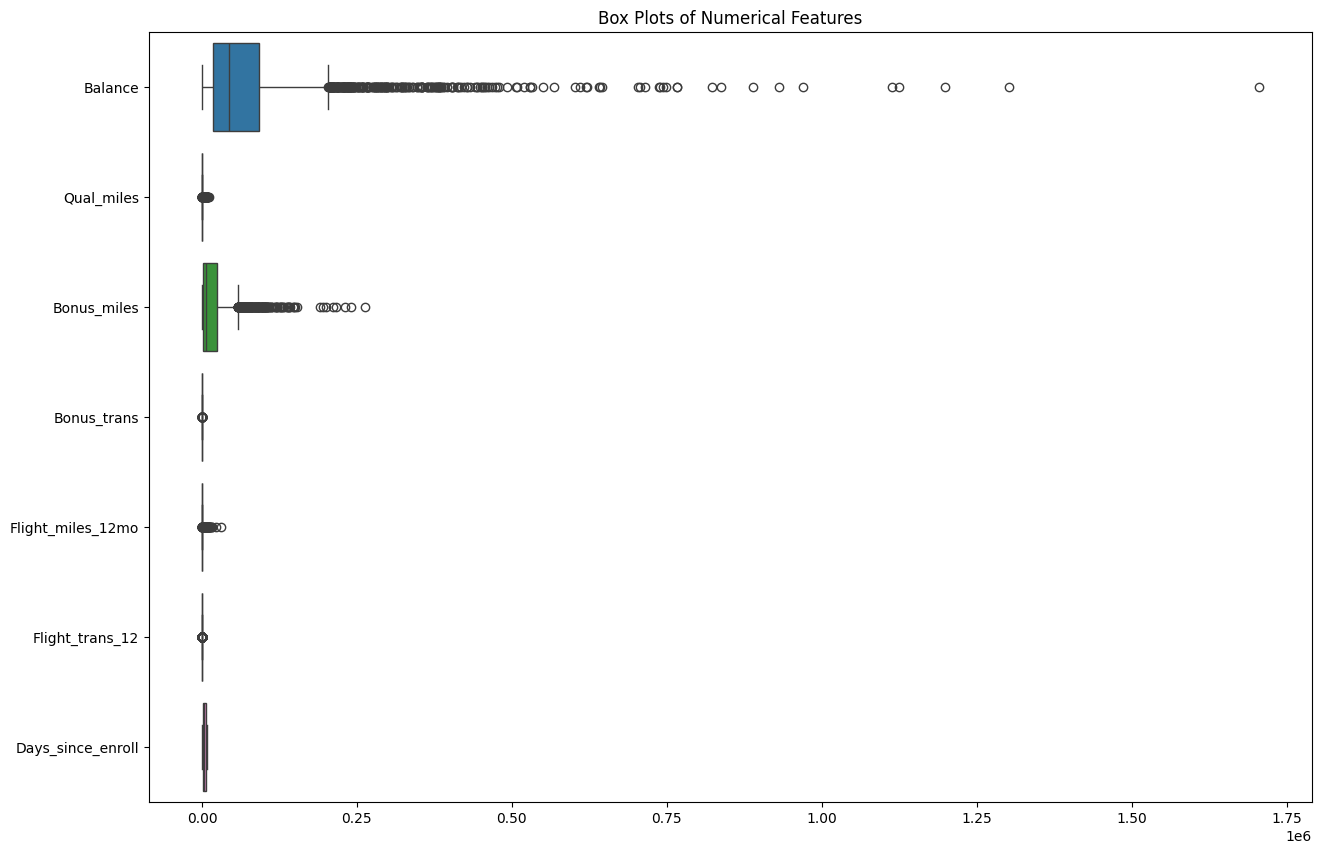

In [48]:
# Box plots for numerical features 

import seaborn as sns

plt.figure(figsize=(15, 10)) 
numerical_features = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']
sns.boxplot(data=df[numerical_features], orient='h') 
plt.title('Box Plots of Numerical Features') 
plt.show()

In [49]:
df.shape

(3999, 11)

In [50]:
#removing outlier

# Define a function to identify outliers using IQR 
def remove_outliers(df, column): 
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR 
# Filter out rows with outliers 
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] 
    return df



# List of numerical columns to check for outliers 
numerical_columns = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll'] 

# Remove outliers from each numerical column 
for column in numerical_columns: 
    df = remove_outliers(df, column)




In [51]:
df.shape

(2403, 11)

In [52]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
5,16420,0,1,1,1,0,0,0,0,6942,0


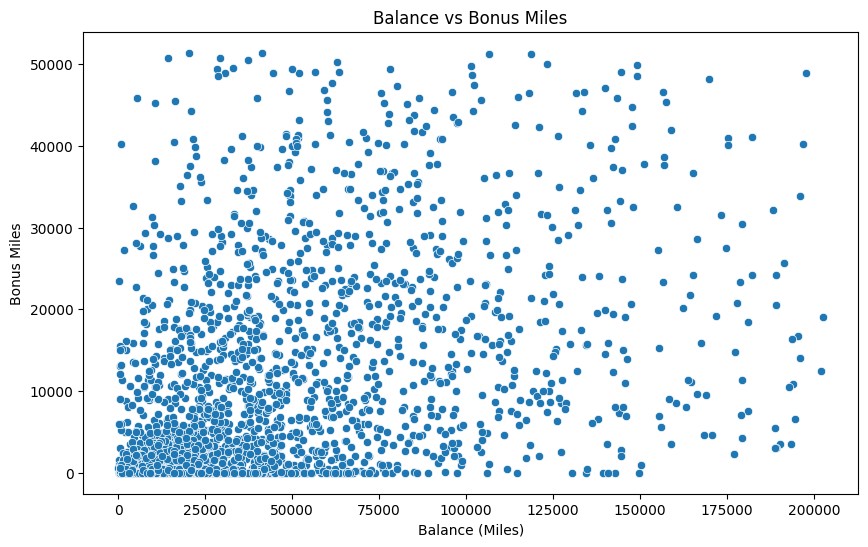

In [53]:
# Scatter plot for Balance vs Bonus Miles
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='Bonus_miles', data=df)
plt.title('Balance vs Bonus Miles')
plt.xlabel('Balance (Miles)')
plt.ylabel('Bonus Miles')
plt.show()


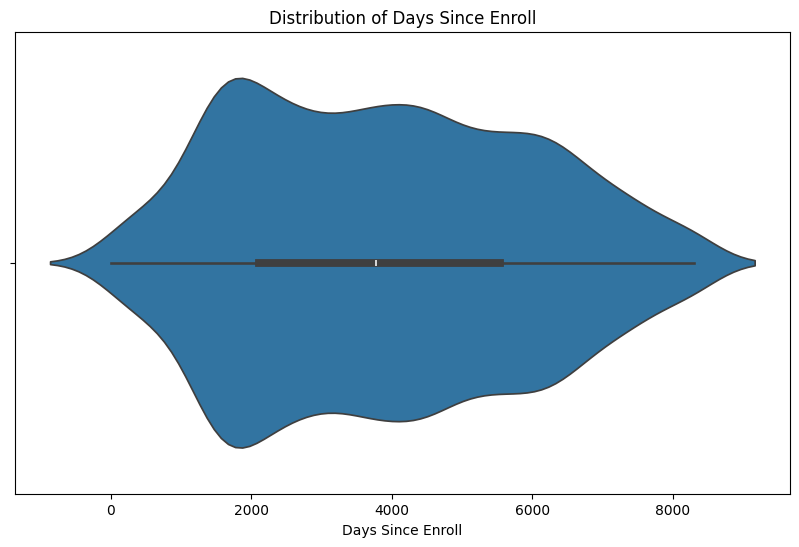

In [54]:
# Violin plot for Days Since Enroll
plt.figure(figsize=(10, 6))
sns.violinplot(x='Days_since_enroll', data=df)
plt.title('Distribution of Days Since Enroll')
plt.xlabel('Days Since Enroll')
plt.show()


In [38]:
from sklearn.preprocessing import StandardScaler

In [58]:
# Normalize numerical data 
scaler = StandardScaler() 
numerical_features = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll'] 
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [59]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.370189,0.0,1,1,1,-0.772013,-1.059209,0.0,0.0,1.505894,0
1,-0.588997,0.0,1,1,1,-0.768682,-0.923728,0.0,0.0,1.490371,0
2,-0.045359,0.0,1,1,1,-0.451171,-0.652766,0.0,0.0,1.522387,0
3,-0.698855,0.0,1,1,1,-0.745527,-1.059209,0.0,0.0,1.482609,0
5,-0.658433,0.0,1,1,1,-0.786150,-1.194690,0.0,0.0,1.477758,0


K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determine the number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)


[14417.734498543487,
 7846.292184984765,
 6143.086366659124,
 5480.599611111212,
 4878.302082510045,
 4331.000445250044,
 3946.888810950457,
 3605.8155068271076,
 3383.630332495397,
 3207.6907735160357]

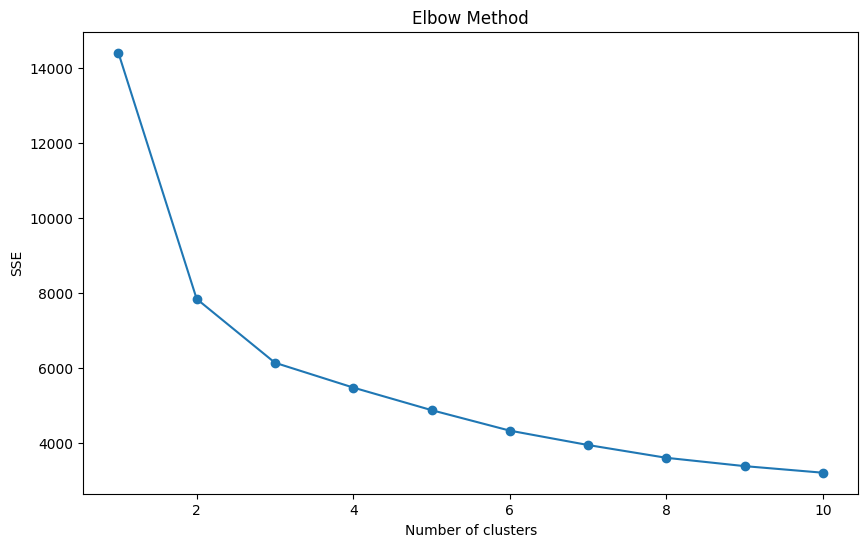

In [64]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [122]:
# Apply K-Means clustering with the optimal number of clusters
optimal_k = 3  # Replace with the optimal number based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df)

# Evaluate the clustering performance
silhouette_avg = silhouette_score(df, df['Cluster_KMeans'])
print(f'Silhouette Score for K-Means: {silhouette_avg}')



Silhouette Score for K-Means: 0.345990031072138


In [129]:
# Apply K-Means clustering with the optimal number of clusters
optimal_k = 4  # Replace with the optimal number based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df)

# Evaluate the clustering performance
silhouette_avg = silhouette_score(df, df['Cluster_KMeans'])
print(f'Silhouette Score for K-Means: {silhouette_avg}')

Silhouette Score for K-Means: 0.38689097363490377


In [150]:
# Apply K-Means clustering with the optimal number of clusters
optimal_k = 5  # Replace with the optimal number based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df)

# Evaluate the clustering performance
silhouette_avg = silhouette_score(df, df['Cluster_KMeans'])
print(f'Silhouette Score for K-Means: {silhouette_avg}')

Silhouette Score for K-Means: 0.42235079351059407


In [151]:
# Apply K-Means clustering with the optimal number of clusters
optimal_k = 6  # Replace with the optimal number based on the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df)

# Evaluate the clustering performance
silhouette_avg = silhouette_score(df, df['Cluster_KMeans'])
print(f'Silhouette Score for K-Means: {silhouette_avg}')

Silhouette Score for K-Means: 0.47132770307908717


Experimented with different values of k for K-Means and found that the optimal number of clusters, k=5, gives the highest silhouette score of 0.42. This is a good indication that k=5 provides the best separation and cohesion among clusters.


Experimented with different values of k for K-Means and found that the optimal number of clusters, k=6, gives the highest silhouette score of 0.47. This is a good indication that k=6 provides the best separation and cohesion among clusters.


In [ ]:
# Apply K-Means clustering with k=5
kmeans = KMeans(n_clusters=5, n_init=20, random_state=42) 
df['Cluster_KMeans'] = kmeans.fit_predict(df)

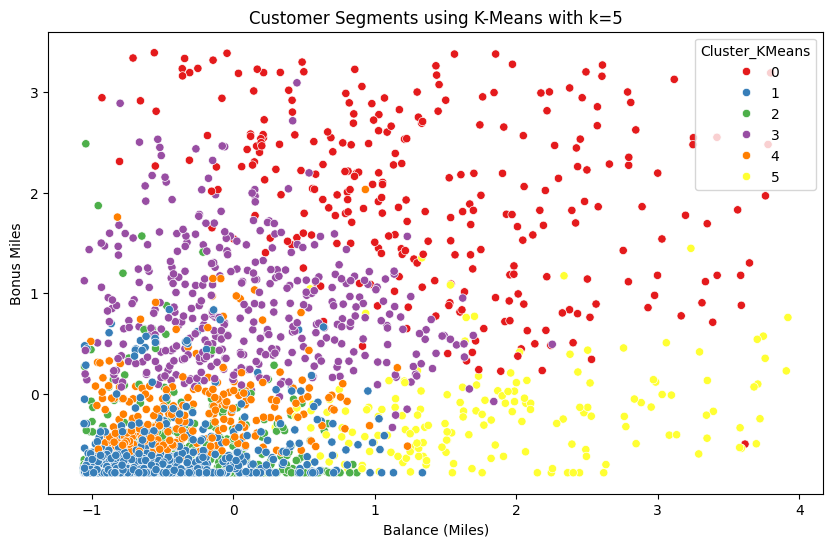

In [ ]:
# Visualize the clusters using Balance vs Bonus Miles 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Balance', y='Bonus_miles', hue='Cluster_KMeans', data=df, palette='Set1') 
plt.title('Customer Segments using K-Means with k=5') 
plt.xlabel('Balance (Miles)') 
plt.ylabel('Bonus Miles') 
plt.show()


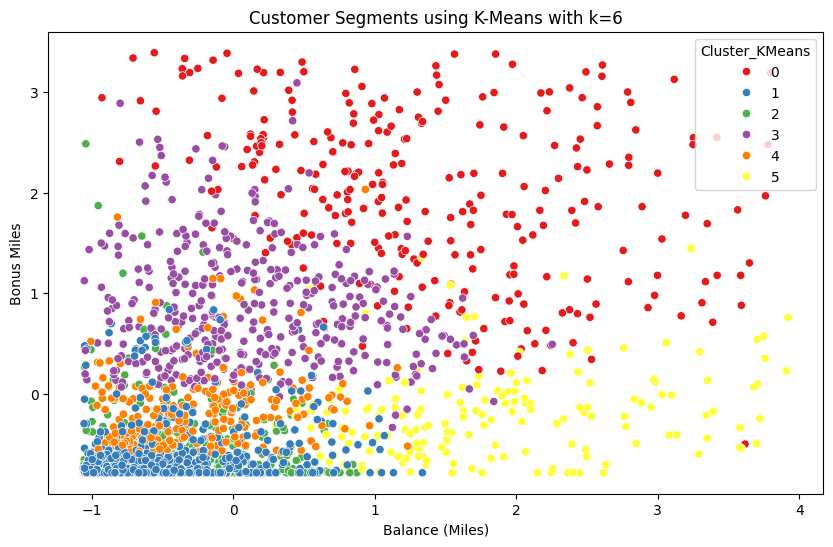

In [154]:
# Apply K-Means clustering with k=6
kmeans = KMeans(n_clusters=6, n_init=20, random_state=42) 
df['Cluster_KMeans'] = kmeans.fit_predict(df)
# Visualize the clusters using Balance vs Bonus Miles 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='Balance', y='Bonus_miles', hue='Cluster_KMeans', data=df, palette='Set1') 
plt.title('Customer Segments using K-Means with k=6') 
plt.xlabel('Balance (Miles)') 
plt.ylabel('Bonus Miles') 
plt.show()

Cluster 0: Customers with moderate balance and high bonus miles, indicating active engagement through non-flight activities.

Cluster 1: Customers with high balance and moderate bonus miles, likely frequent flyers with additional engagement.

Cluster 2: Customers with lower balance and lower bonus miles, indicating less engaged or newer customers.

Cluster 3: Customers with high balance and low bonus miles, indicating high flight activity but less engagement through non-flight activities.

Cluster 4: Customers with low to moderate balance but high bonus miles, suggesting they earn miles through non-flight means but don’t fly as much.

Cluster 5: Customers with very high balance and a mix of bonus mile activities, possibly the most loyal and engaged segment.

Hierarchical Clustering

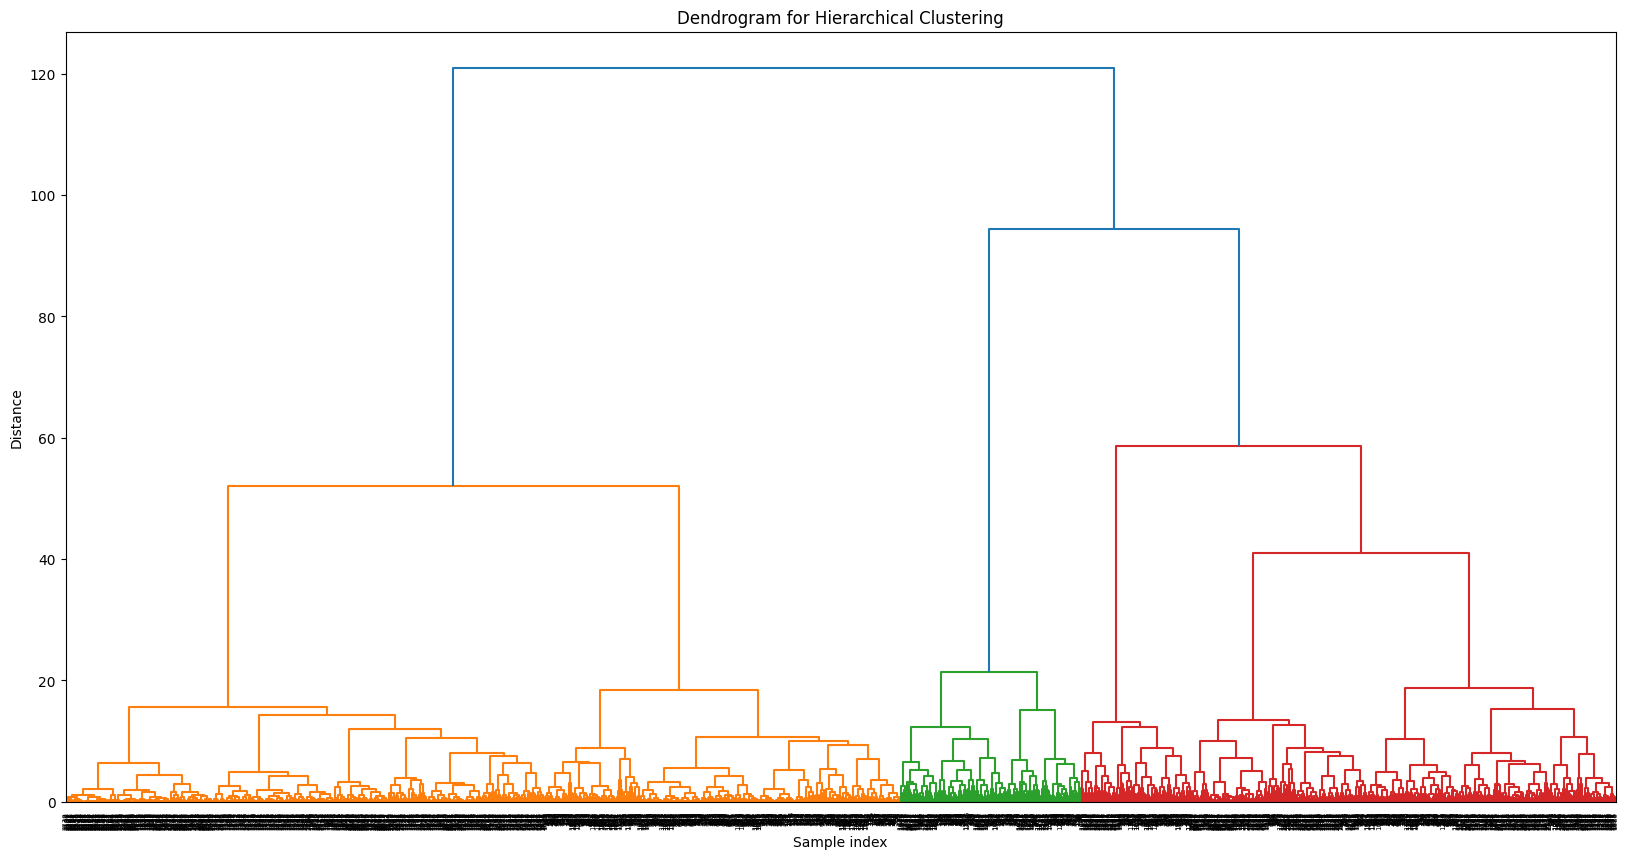

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Generate the linkage matrix
Z = linkage(df, method='ward')

#Ward Linkage: Focuses on minimizing variance within clusters, creating compact and similarly-sized clusters.


# Plot the dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()



In [ ]:
# Apply hierarchical clustering with the chosen linkage method
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Cluster_Hierarchical'] = hierarchical.fit_predict(df)

# Evaluate the clustering performance
silhouette_avg = silhouette_score(df, df['Cluster_Hierarchical'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_avg}')




Silhouette Score for Hierarchical Clustering: 0.4316505246556231


In [175]:
# Group by clusters and calculate mean values for each feature
cluster_analysis = df.groupby('Cluster_Hierarchical').mean()
print(cluster_analysis)

                       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_Hierarchical                                                          
0                     0.523276         0.0   1.401806   1.051919   1.009029   
1                     0.118126         0.0   3.070130   1.000000   1.000000   
2                     1.377282         0.0   3.747331   1.000000   1.003559   
3                    -0.544271         0.0   1.014785   1.005376   1.000000   
4                    -0.471579         0.0   1.052727   1.014545   1.000000   

                      Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster_Hierarchical                                                
0                       -0.190131     0.709076                0.0   
1                        0.863916     0.817465                0.0   
2                        1.963053     1.056414                0.0   
3                       -0.639156    -0.802269                0.0   
4                       -0.58993

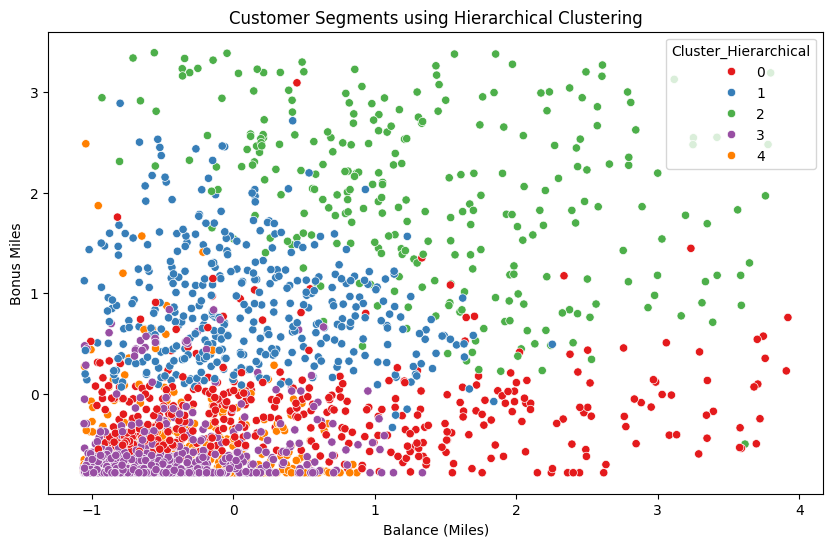

In [176]:


# Visualize the clusters using Balance vs Bonus Miles
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='Cluster_Hierarchical', data=df, palette='Set1')
plt.title('Customer Segments using Hierarchical Clustering')
plt.xlabel('Balance (Miles)')
plt.ylabel('Bonus Miles')
plt.show()


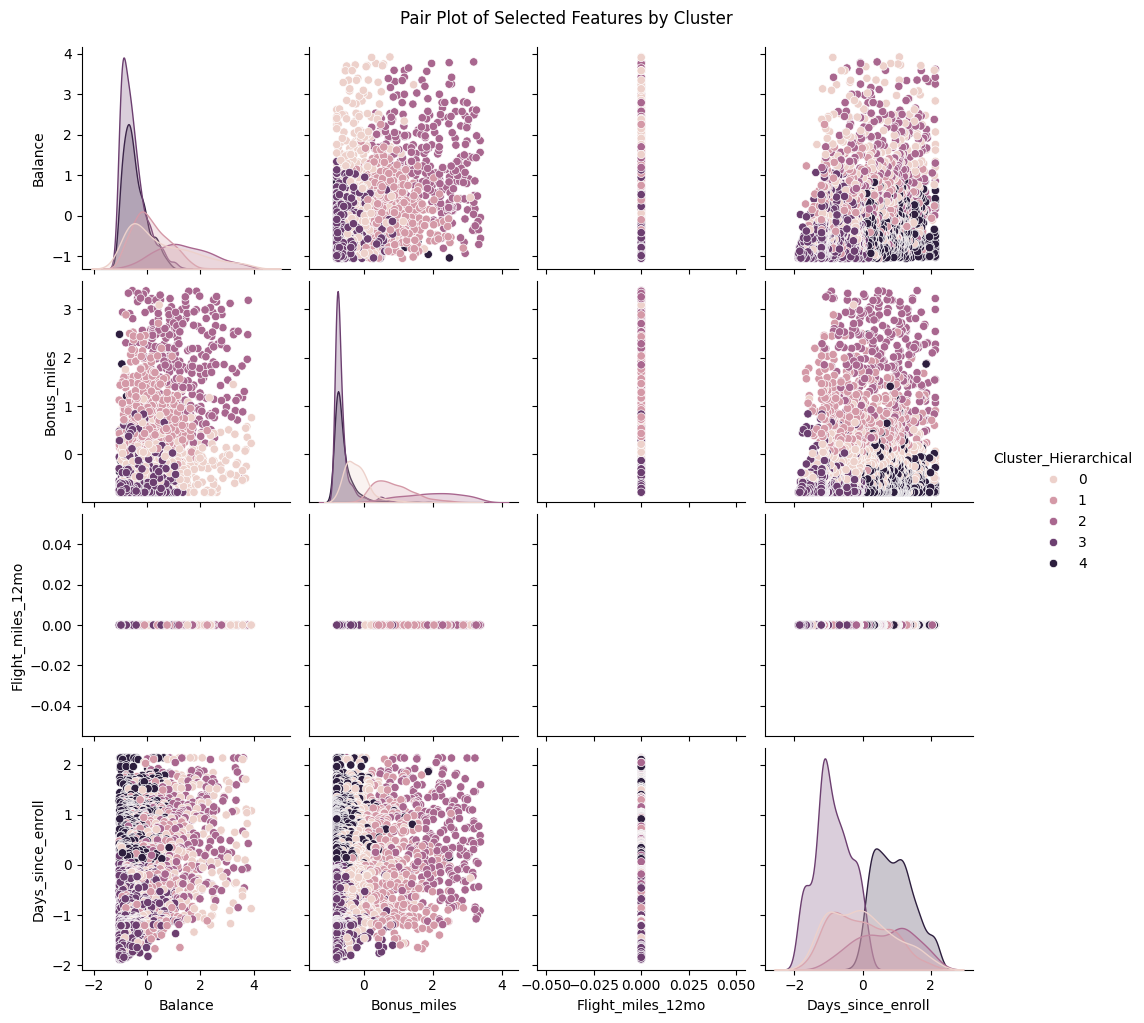

In [179]:
selected_features = ['Balance', 'Bonus_miles', 'Flight_miles_12mo', 'Days_since_enroll']
sns.pairplot(df[selected_features + ['Cluster_Hierarchical']], hue='Cluster_Hierarchical', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features by Cluster', y=1.02)
plt.show()


DBSCAN


In [192]:
from sklearn.cluster import DBSCAN

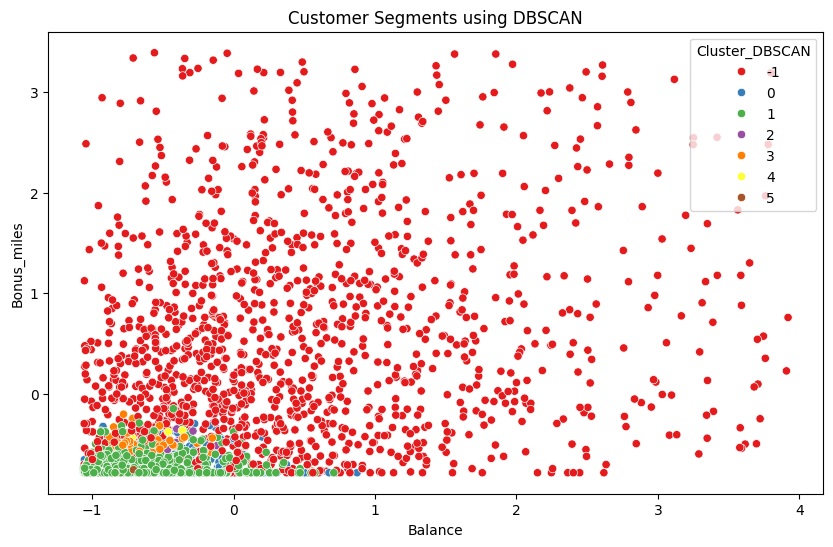

In [193]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.4, min_samples=10)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Balance', y='Bonus_miles', hue='Cluster_DBSCAN', data=df, palette='Set1')
plt.title('Customer Segments using DBSCAN')
plt.show()


In [194]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_KMeans,Cluster_Hierarchical,Cluster_DBSCAN
0,-0.370189,0.0,1,1,1,-0.772013,-1.059209,0.0,0.0,1.505894,0,2,4,0
1,-0.588997,0.0,1,1,1,-0.768682,-0.923728,0.0,0.0,1.490371,0,2,4,0
2,-0.045359,0.0,1,1,1,-0.451171,-0.652766,0.0,0.0,1.522387,0,2,4,-1
3,-0.698855,0.0,1,1,1,-0.745527,-1.059209,0.0,0.0,1.482609,0,2,4,0
5,-0.658433,0.0,1,1,1,-0.786150,-1.194690,0.0,0.0,1.477758,0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,-0.787249,0.0,1,1,1,-0.710672,0.431081,0.0,0.0,-1.207244,0,1,3,1
3993,-0.964453,0.0,1,1,1,-0.756495,-0.788247,0.0,0.0,-1.212095,0,1,3,1
3995,0.520925,0.0,1,1,1,-0.706447,-0.517285,0.0,0.0,-1.213065,1,1,3,-1
3996,0.747428,0.0,3,1,1,1.281330,-0.110843,0.0,0.0,-1.209669,1,3,1,-1


In [195]:
# Calculate mean values for each cluster
cluster_means = df.groupby('Cluster_DBSCAN').mean()

# Display the mean values
print(cluster_means)


                 Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
Cluster_DBSCAN                                                          
-1              0.449395         0.0   2.297749   1.025418   1.003631   
 0             -0.544075         0.0   1.000000   1.000000   1.000000   
 1             -0.636635         0.0   1.000000   1.000000   1.000000   
 2             -0.396992         0.0   1.000000   1.000000   1.000000   
 3             -0.646558         0.0   1.000000   1.000000   1.000000   
 4             -0.505287         0.0   1.000000   1.000000   1.000000   
 5             -0.744823         0.0   1.000000   1.000000   1.000000   

                Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
Cluster_DBSCAN                                                                 
-1                 0.523421     0.528288                0.0              0.0   
 0                -0.707482    -0.764162                0.0              0.0   
 1                -0.7

Each cluster (0, 1, 2, 3, 4, and 5) represents a different segment of customers.

For example, Cluster 0 has negative mean values for Balance and Bonus_miles, indicating lower balances and bonus miles compared to Cluster -1.

Cluster 3 has a high value for Bonus_trans, indicating frequent non-flight bonus transactions.

High-value customers: Cluster -1 could represent high-value customers with higher balances and bonus miles.

Frequent flyers: Clusters with higher values for Flight_miles_12mo and Flight_trans_12 could represent frequent flyers.